In [22]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Classification Models

In [2]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_hotel_traintest.csv'
tb_hotel = pd.read_csv(url)

In [3]:
tb_hotel.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,3
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01,4


In [4]:
tb_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           113409 non-null  object 
 1   is_cancelled                    113409 non-null  int64  
 2   lead_time                       113409 non-null  int64  
 3   stays_in_weekend_nights         113409 non-null  int64  
 4   stays_in_week_nights            113409 non-null  int64  
 5   adults                          113409 non-null  int64  
 6   children                        113406 non-null  float64
 7   babies                          113409 non-null  int64  
 8   meal                            113409 non-null  object 
 9   country                         112951 non-null  object 
 10  market_segment                  113409 non-null  object 
 11  distribution_channel            113409 non-null  object 
 12  is_repeated_gues

In [5]:
# Cleaning Lead Time outliers
q25 = np.quantile(tb_hotel['lead_time'], 0.25)
q75 = np.quantile(tb_hotel['lead_time'], 0.75)
IQR = q75 - q25
mask = (tb_hotel['lead_time'] > (q75 + 3 * IQR)) | (tb_hotel['lead_time'] < (q25 - 3 * IQR))
tb_hotel = tb_hotel[~mask]

In [6]:
# Cleaning NAs
tb_hotel['children'] = tb_hotel['children'].fillna(0)
tb_hotel['is_company'] = np.where(tb_hotel['company'].isna(), 0, 1)
tb_hotel['is_agent'] = np.where(tb_hotel['agent'].isna(), 0, 1)
tb_hotel = tb_hotel.drop(['company', 'agent'], axis = 1).dropna()

In [7]:
tb_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112794 entries, 0 to 113408
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           112794 non-null  object 
 1   is_cancelled                    112794 non-null  int64  
 2   lead_time                       112794 non-null  int64  
 3   stays_in_weekend_nights         112794 non-null  int64  
 4   stays_in_week_nights            112794 non-null  int64  
 5   adults                          112794 non-null  int64  
 6   children                        112794 non-null  float64
 7   babies                          112794 non-null  int64  
 8   meal                            112794 non-null  object 
 9   country                         112794 non-null  object 
 10  market_segment                  112794 non-null  object 
 11  distribution_channel            112794 non-null  object 
 12  is_repeated_gues

# Estimating Probabilities

In [9]:
tb_hotel['is_cancelled'].sum()/tb_hotel['is_cancelled'].count()

0.3707466709222122

In [10]:
tb_hotel.groupby('is_company')['is_cancelled'].mean()

is_company
0    0.382191
1    0.176442
Name: is_cancelled, dtype: float64

In [11]:
tb_hotel.groupby('meal')['is_cancelled'].mean()

meal
BB           0.374139
FB           0.600801
HB           0.347114
SC           0.370620
Undefined    0.242780
Name: is_cancelled, dtype: float64

In [12]:
tb_hotel['cat_lead_time'] = pd.qcut(tb_hotel['lead_time'], 5)

In [13]:
tb_hotel.groupby('cat_lead_time')['is_cancelled'].mean()

cat_lead_time
(-0.001, 12.0]    0.122876
(12.0, 45.0]      0.324240
(45.0, 100.0]     0.396101
(100.0, 184.0]    0.450065
(184.0, 587.0]    0.570013
Name: is_cancelled, dtype: float64

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X = tb_hotel[['lead_time']]
y = tb_hotel['is_cancelled']

log_fit = LogisticRegression()
log_fit.fit(X, y)

LogisticRegression()

In [18]:
log_fit.coef_

array([[0.0058171]])

In [19]:
log_fit.intercept_

array([-1.15867813])

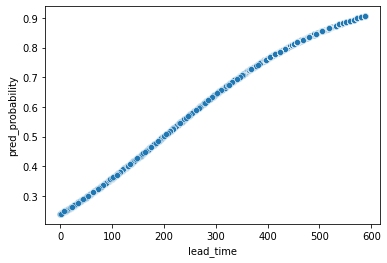

In [27]:
tb_hotel['pred_probability'] = log_fit.predict_proba(X)[:,1]
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_probability');

In [31]:
log_fit.predict_proba(X)[:,1]

array([0.6965174 , 0.24639016, 0.25292815, ..., 0.27669866, 0.37177379,
       0.5084558 ])

## Using Categorical Features

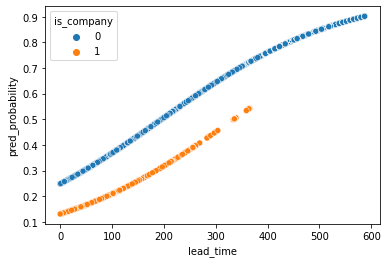

In [33]:
X = tb_hotel[['lead_time', 'is_company']]
y = tb_hotel['is_cancelled']

log_fit = LogisticRegression()
log_fit.fit(X, y)

tb_hotel['pred_probability'] = log_fit.predict_proba(X)[:,1]
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_probability', hue = 'is_company');

In [35]:
[2] * 3

[2, 2, 2]

In [36]:
simul_lead_time = list(np.linspace(0, 1000, 1000)) * 2
simul_company = [0] * 1000 + [1] * 1000
tb_simulation = pd.DataFrame({'lead_time' : simul_lead_time, 'is_company' : simul_company})

In [38]:
tb_simulation['pred_probability'] = log_fit.predict_proba(tb_simulation[['lead_time', 'is_company']])[:,1]
tb_simulation.head()

,lead_time,is_company,pred_probability
0,0.000000,0,0.248322
1,1.001001,0,0.249383
2,2.002002,0,0.250447
3,3.003003,0,0.251513
4,4.004004,0,0.252583


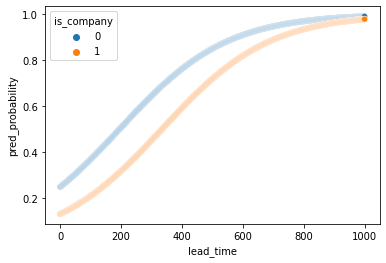

In [39]:
sns.scatterplot(data = tb_simulation, x = 'lead_time', y = 'pred_probability', hue = 'is_company');

In [ ]:
tb_hotel['company_lead_time'] = tb_hotel['+lead_time']
X = tb_hotel[['lead_time', 'is_company']]
y = tb_hotel['is_cancelled']

log_fit = LogisticRegression()
log_fit.fit(X, y)

tb_hotel['pred_probability'] = log_fit.predict_proba(X)[:,1]
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_probability', hue = 'is_company');

In [45]:
log_fit.predict_proba(X)

array([[0.30345972, 0.69654028],
       [0.74419804, 0.25580196],
       [0.73767045, 0.26232955],
       ...,
       [0.71399519, 0.28600481],
       [0.62005166, 0.37994834],
       [0.4864132 , 0.5135868 ]])

# Thresholding - Probability to Prediction

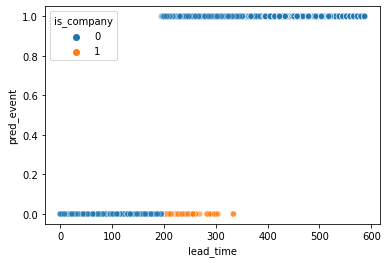

In [41]:
tb_hotel['pred_event'] = log_fit.predict(X)
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_event', hue = 'is_company', alpha = 0.6)

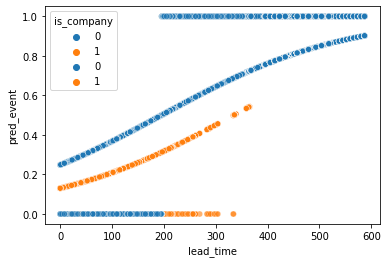

In [42]:
tb_hotel['pred_event'] = log_fit.predict(X)
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_event', hue = 'is_company', alpha = 0.6)
sns.scatterplot(data = tb_hotel, x = 'lead_time', y = 'pred_probability', hue = 'is_company')

In [ ]:
tb_hotel['pred_event_certain'] = np.where(tb_hotel['pred_proba'] >= 0.8, 1, 0) 

## ROC Curve

In [43]:
from sklearn.metrics import roc_curve

In [44]:
fpr, tpr, thr = roc_curve(tb_hotel['is_cancelled'], tb_hotel['pred_probability'])

In [46]:
tb_roc = pd.DataFrame({'fpr' : fpr, 'tpr' : tpr, 'thr' : thr})

In [48]:
np.linspace(0.13, 0.9, 600)

array([0.13      , 0.13128548, 0.13257095, 0.13385643, 0.1351419 ,
       0.13642738, 0.13771285, 0.13899833, 0.14028381, 0.14156928,
       0.14285476, 0.14414023, 0.14542571, 0.14671119, 0.14799666,
       0.14928214, 0.15056761, 0.15185309, 0.15313856, 0.15442404,
       0.15570952, 0.15699499, 0.15828047, 0.15956594, 0.16085142,
       0.16213689, 0.16342237, 0.16470785, 0.16599332, 0.1672788 ,
       0.16856427, 0.16984975, 0.17113523, 0.1724207 , 0.17370618,
       0.17499165, 0.17627713, 0.1775626 , 0.17884808, 0.18013356,
       0.18141903, 0.18270451, 0.18398998, 0.18527546, 0.18656093,
       0.18784641, 0.18913189, 0.19041736, 0.19170284, 0.19298831,
       0.19427379, 0.19555927, 0.19684474, 0.19813022, 0.19941569,
       0.20070117, 0.20198664, 0.20327212, 0.2045576 , 0.20584307,
       0.20712855, 0.20841402, 0.2096995 , 0.21098497, 0.21227045,
       0.21355593, 0.2148414 , 0.21612688, 0.21741235, 0.21869783,
       0.21998331, 0.22126878, 0.22255426, 0.22383973, 0.22512

In [51]:
tb_roc = tb_roc[tb_roc['thr'] < 1]
tb_roc

,fpr,tpr,thr
1,0.000000,0.000407,0.901990
2,0.000000,0.000789,0.898426
3,0.000000,0.001148,0.894748
4,0.000000,0.001913,0.887038
5,0.000000,0.002320,0.883001
...,...,...,...
652,0.977387,0.996341,0.132927
653,0.980951,0.997298,0.132275
654,0.984713,0.997943,0.131626
655,0.990208,0.998972,0.130979


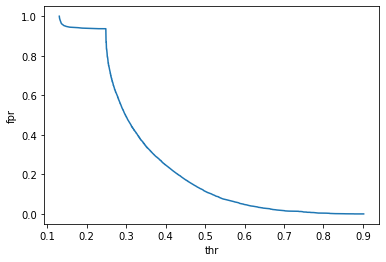

In [54]:
# Number of Predicted Cancelations that were Real Cancelations
sns.lineplot(data = tb_roc, x= 'thr', y = 'fpr')

In [57]:
# 0 - 0 = Model predict non-cancelation correctly
# 0 - 1 = Model predicted a cancelation when there was none
# 1 - 0 = Model predicted no cancelation when there cancelation
# 1 - 1 = Model predicted cancelation correctly
tb_hotel.groupby(['is_cancelled', 'pred_event'])['pred_event'].count()

is_cancelled  pred_event
0             0             62871
              1              8105
1             0             30051
              1             11767
Name: pred_event, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


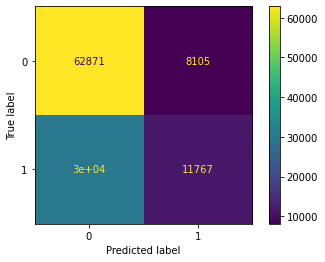

In [66]:
plot_confusion_matrix(log_fit, X, tb_hotel['is_cancelled'])

# Measuring Error

In [67]:
from sklearn.metrics import f1_score

In [68]:
f1_score(tb_hotel['is_cancelled'], tb_hotel['pred_event'])

0.3814880855892365